# COVID PRESENT STATE: INDIA & Himachal Pradesh  (DATA TILL 03.07.2020)

In [735]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt 
import geopandas as gpd
import seaborn as sns

CovidDF = pd.read_csv("States_covid_19_india.csv").drop(columns = 'Sno')
PoplDF = pd.read_csv("population_india_census2011.csv").sort_values(by=['State / Union Territory'])
PoplDF.set_index("State / Union Territory", inplace = True)
CovidData = CovidDF.groupby('State/UnionTerritory').sum()
PoplData = pd.DataFrame(PoplDF['Population'])
FinalData = pd.concat([CovidData, PoplData], axis=1, sort=True).dropna().rename_axis("State")
FinalData['IFR'] = FinalData.apply(lambda row: (row.Deaths*100)/row.Confirmed, axis = 1)
FinalData['CMR'] = FinalData.apply(lambda row: (row.Deaths*100)/row.Population, axis = 1)
FinalData['CCR'] = FinalData.apply(lambda row: (row.Cured*100)/(row.Confirmed), axis = 1)

FinalDataF = FinalData.drop('Ladakh')
FinalDataF.reset_index(inplace = True)
FinalDataF.head()

,State,Cured,Deaths,Confirmed,Population,IFR,CMR,CCR
0,Andaman and Nicobar Islands,2406.0,0.0,3202.0,380581.0,0.000000,0.000000,75.140537
1,Andhra Pradesh,172711.0,5385.0,353409.0,49577103.0,1.523730,0.010862,48.870006
2,Arunachal Pradesh,673.0,8.0,3476.0,1383727.0,0.230150,0.000578,19.361335
3,Assam,85791.0,342.0,158131.0,31205576.0,0.216276,0.001096,54.253119
4,Bihar,168614.0,1772.0,275501.0,104099452.0,0.643192,0.001702,61.202682


In [736]:
fp = "Indian_States.shp"
map_df1 = gpd.read_file(fp)
map_df2 = map_df1.drop(7)
map_df3 = map_df2.drop(16)
map_df3.head()

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


In [737]:
FinalDataF['State'].iloc[0]  = 'Andaman & Nicobar Island'
FinalDataF['State'].iloc[2] = 'Arunanchal Pradesh'
FinalDataF['State'].iloc[7] = 'Dadara & Nagar Havelli'
FinalDataF['State'].iloc[8] = 'NCT of Delhi'
FinalDataF['State'].iloc[13] = 'Jammu & Kashmir'
FinalDataF['State'].iloc[29] = 'Telangana'

/Users/satyan/python/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


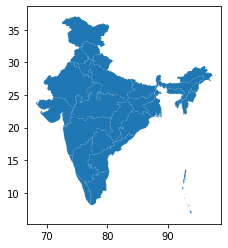

In [738]:
map_df3.plot()
plt.show()

In [739]:
merged = map_df3.set_index('st_nm').join(FinalDataF.set_index('State'))
merged.head()

,geometry,Cured,Deaths,Confirmed,Population,IFR,CMR,CCR
st_nm,,,,,,,,
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",2406.0,0.0,3202.0,380581.0,0.000000,0.000000,75.140537
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",673.0,8.0,3476.0,1383727.0,0.230150,0.000578,19.361335
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",85791.0,342.0,158131.0,31205576.0,0.216276,0.001096,54.253119
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",168614.0,1772.0,275501.0,104099452.0,0.643192,0.001702,61.202682
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",12453.0,254.0,18676.0,1055450.0,1.360034,0.024066,66.679160


In [740]:
merged.describe()

,Cured,Deaths,Confirmed,Population,IFR,CMR,CCR
count,3.400000e+01,34.000000,3.400000e+01,3.400000e+01,34.000000,34.000000,34.000000
mean,2.313083e+05,13872.235294,4.475334e+05,3.559499e+07,1.543270,0.027323,50.803592
std,4.456426e+05,37767.675845,9.552495e+05,4.352564e+07,1.606329,0.068656,13.432132
min,5.620000e+02,0.000000,1.736000e+03,3.805810e+05,0.000000,0.000000,19.361335
25%,6.956250e+03,40.250000,1.918200e+04,2.126474e+06,0.219745,0.001070,45.327439
50%,5.839400e+04,704.000000,1.149990e+05,2.544833e+07,1.209881,0.006729,53.565518
75%,1.726925e+05,5407.500000,3.466468e+05,5.772404e+07,2.302617,0.020133,59.081191
max,2.223864e+06,206668.000000,5.018962e+06,1.998123e+08,5.979271,0.357739,75.140537


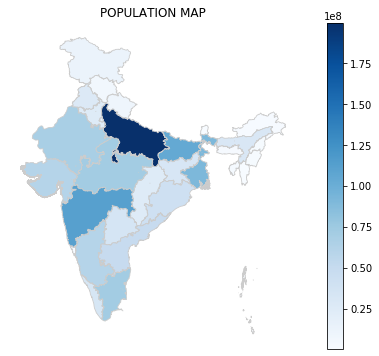

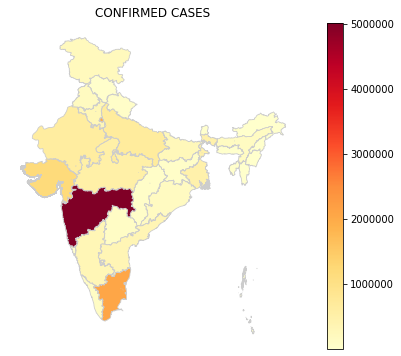

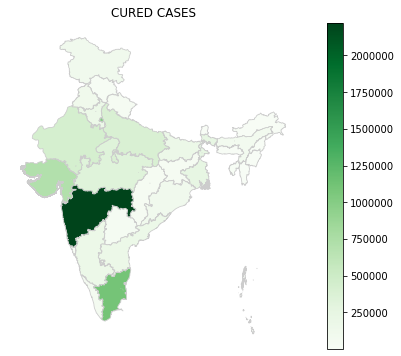

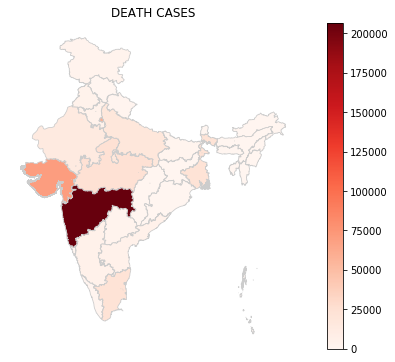

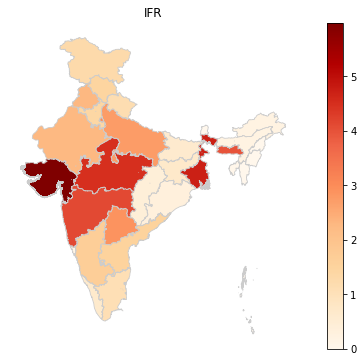

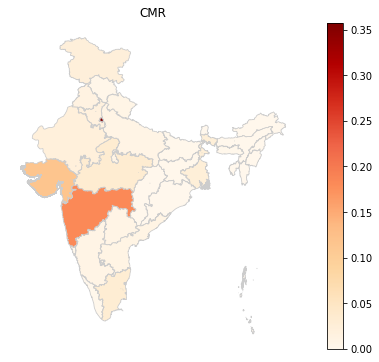

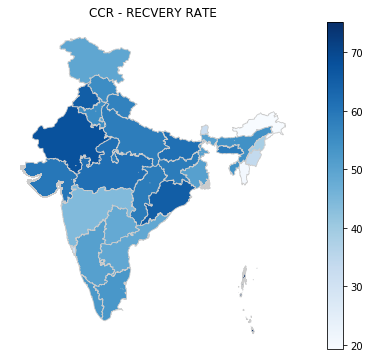

In [741]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('POPULATION MAP', fontdict={'fontsize': '12', 'fontweight' : '3'})
merged.plot(column='Population', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
#fig.savefig("INDIA_Population.png", dpi=100)
plt.show()

fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('CONFIRMED CASES', fontdict={'fontsize': '12', 'fontweight' : '3'})
merged.plot(column='Confirmed', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
#fig.savefig("INDIA_Confirmed.png", dpi=100)
plt.show()

fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('CURED CASES', fontdict={'fontsize': '12', 'fontweight' : '3'})
merged.plot(column='Cured', cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
#fig.savefig("INDIA_Cured.png", dpi=100)
plt.show()

fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('DEATH CASES', fontdict={'fontsize': '12', 'fontweight' : '3'})
merged.plot(column='Deaths', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
#fig.savefig("INDIA_Deaths.png", dpi=100)
plt.show()

fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('IFR', fontdict={'fontsize': '12', 'fontweight' : '3'})
merged.plot(column='IFR', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
#fig.savefig("INDIA_IFR.png", dpi=100)
plt.show()

fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('CMR', fontdict={'fontsize': '12', 'fontweight' : '3'})
merged.plot(column='CMR', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
#fig.savefig("INDIA_CMR.png", dpi=100)
plt.show()

fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('CCR - RECVERY RATE', fontdict={'fontsize': '12', 'fontweight' : '3'})
merged.plot(column='CCR', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
#fig.savefig("INDIA_CCR.png", dpi=100)
plt.show()


In [742]:
FinalDataF.head()

,State,Cured,Deaths,Confirmed,Population,IFR,CMR,CCR
0,Andaman & Nicobar Island,2406.0,0.0,3202.0,380581.0,0.000000,0.000000,75.140537
1,Andhra Pradesh,172711.0,5385.0,353409.0,49577103.0,1.523730,0.010862,48.870006
2,Arunanchal Pradesh,673.0,8.0,3476.0,1383727.0,0.230150,0.000578,19.361335
3,Assam,85791.0,342.0,158131.0,31205576.0,0.216276,0.001096,54.253119
4,Bihar,168614.0,1772.0,275501.0,104099452.0,0.643192,0.001702,61.202682


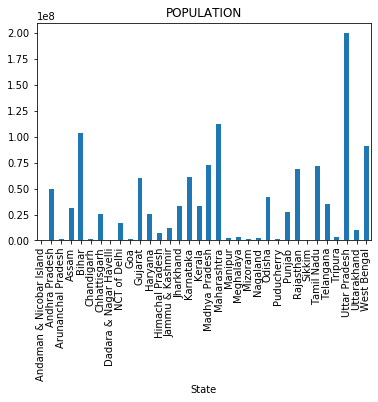

In [743]:
FinalDataP = FinalDataF.set_index("State")
FinalDataP['Population'].plot(kind = 'bar', title = 'POPULATION')
plt.show()

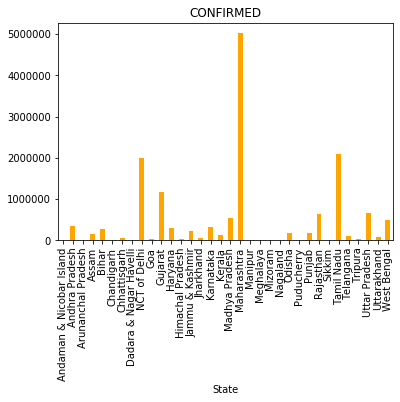

In [744]:
FinalDataP['Confirmed'].plot(kind = 'bar',color = 'orange', title = 'CONFIRMED')
plt.show()

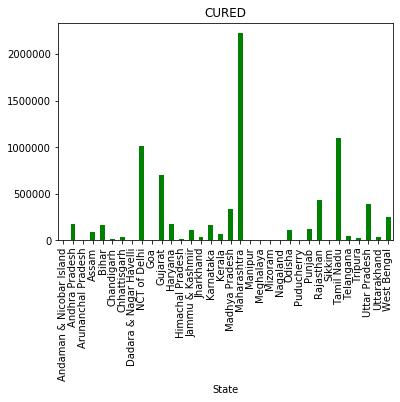

In [745]:
FinalDataP['Cured'].plot(kind = 'bar', color = 'green', title = 'CURED')
plt.show()

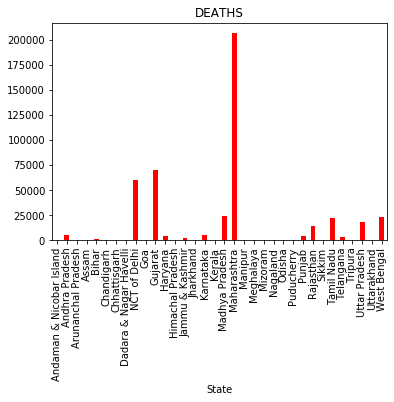

In [746]:
FinalDataP['Deaths'].plot(kind = 'bar',color = 'red', title = 'DEATHS')
plt.show()

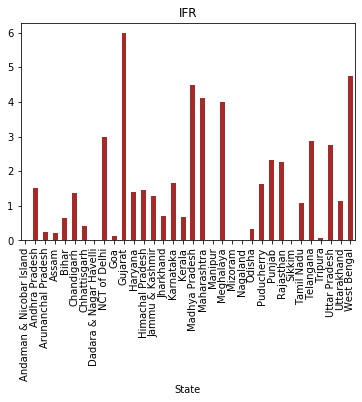

In [747]:
FinalDataP['IFR'].plot(kind = 'bar',color = 'brown', title = 'IFR')
plt.show()

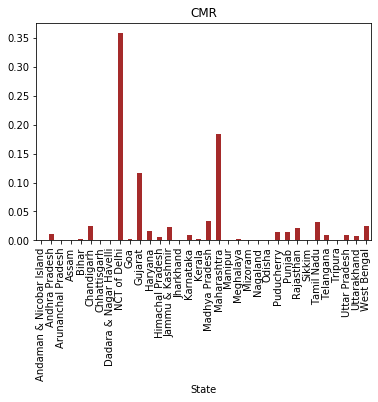

In [748]:
FinalDataP['CMR'].plot(kind = 'bar', color = 'brown', title = 'CMR')
plt.show()

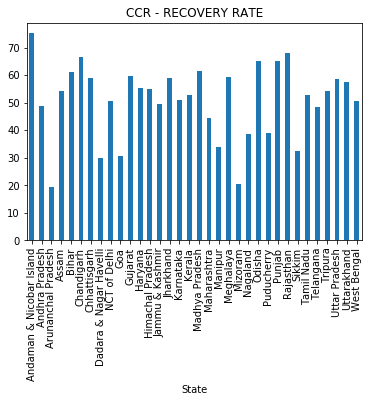

In [749]:
FinalDataP['CCR'].plot(kind = 'bar', title = 'CCR - RECOVERY RATE')
plt.show()

In [750]:
FinalDataP['CCR'].describe()

count    34.000000
mean     50.803592
std      13.432132
min      19.361335
25%      45.327439
50%      53.565518
75%      59.081191
max      75.140537
Name: CCR, dtype: float64

# Analyis for all Districts of India. Any State analasis can be done from it.

In [751]:
fp1 = "gadm36_IND_2.shp"
map_df1 = gpd.read_file(fp1)
map_df1.head()

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,IND,India,IND.1_1,Andaman and Nicobar,None,IND.1.1_1,Nicobar Islands,None,None,District,District,None,IN.AN.NI,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,IND,India,IND.1_1,Andaman and Nicobar,None,IND.1.2_1,North and Middle Andaman,None,None,District,District,None,IN.AN.NM,"MULTIPOLYGON (((92.93898 12.22386, 92.93916 12..."
2,IND,India,IND.1_1,Andaman and Nicobar,None,IND.1.3_1,South Andaman,None,None,District,District,None,IN.AN.SA,"MULTIPOLYGON (((92.47972 10.52056, 92.47945 10..."
3,IND,India,IND.2_1,Andhra Pradesh,None,IND.2.1_1,Anantapur,"Anantpur, Ananthapur",None,District,District,None,IN.AD.AN,"POLYGON ((77.71420 13.76079, 77.71314 13.75074..."
4,IND,India,IND.2_1,Andhra Pradesh,None,IND.2.2_1,Chittoor,Chitoor|Chittor,None,District,District,None,IN.AD.CH,"POLYGON ((78.46293 12.63537, 78.46190 12.63228..."


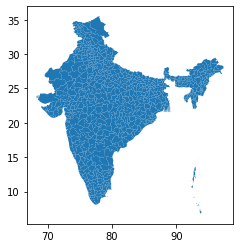

In [752]:
map_df1 = map_df1[['NAME_2', 'geometry']]
map_df1.plot()
plt.show()

In [753]:
district_wise1 = pd.read_csv('district_wise.csv')
district_wise1.drop(794, inplace = True)
district_wise1.drop(4, inplace = True)
district_wise1.drop(0, inplace = True)
district_wise1.head()

,SlNo,State_Code,State,District_Key,District,Confirmed,Active,Recovered,Deceased,Migrated_Other,Delta_Confirmed,Delta_Active,Delta_Recovered,Delta_Deceased,District_Notes,Last_Updated
1,1,AN,Andaman and Nicobar Islands,AN_Nicobars,Nicobars,0,0,0,0,0,0,0,0,0,NaN,NaN
2,2,AN,Andaman and Nicobar Islands,AN_North and Middle Andaman,North and Middle Andaman,1,0,1,0,0,0,0,0,0,NaN,NaN
3,3,AN,Andaman and Nicobar Islands,AN_South Andaman,South Andaman,51,19,32,0,0,0,0,0,0,NaN,NaN
5,4,AP,Andhra Pradesh,AP_Anantapur,Anantapur,5141,2341,2732,68,0,637,518,116,3,NaN,NaN
6,5,AP,Andhra Pradesh,AP_Chittoor,Chittoor,4647,3139,1462,46,0,440,389,49,2,NaN,NaN


In [754]:
district_wise1 = district_wise1[['State','District', 'Confirmed','Active','Recovered','Deceased']]
merged1 = map_df1.set_index('NAME_2').join(district_wise1.set_index('District'))
merged1.head()

,geometry,State,Confirmed,Active,Recovered,Deceased
Adilabad,"POLYGON ((79.92231 19.15713, 79.90597 19.14179...",Telangana,96.0,81.0,15.0,0.0
Agar Malwa,"POLYGON ((76.19970 23.70700, 76.19933 23.70590...",Madhya Pradesh,49.0,19.0,28.0,2.0
Agra,"POLYGON ((78.20979 26.83609, 78.21165 26.83846...",Uttar Pradesh,1497.0,168.0,1233.0,96.0
Ahmadabad,"POLYGON ((71.89120 22.09747, 71.88139 22.09477...",NaN,NaN,NaN,NaN,NaN
Ahmadnagar,"POLYGON ((74.83829 18.33893, 74.83713 18.34180...",NaN,NaN,NaN,NaN,NaN


In [755]:
print(merged1.isna().sum())
print('\nThere are some district names that are either mispelled or missing. Need not correct them as they are few in number.')

geometry      0
State        87
Confirmed    87
Active       87
Recovered    87
Deceased     87
dtype: int64

There are some district names that are either mispelled or missing. Need not correct them as they are few in number.


In [756]:
merged1.describe().round()

,Confirmed,Active,Recovered,Deceased
count,589.0,589.0,589.0,589.0
mean,1221.0,522.0,675.0,24.0
std,5430.0,2528.0,3364.0,123.0
min,0.0,0.0,0.0,0.0
25%,136.0,32.0,67.0,0.0
50%,324.0,105.0,192.0,2.0
75%,756.0,278.0,456.0,10.0
max,85859.0,37295.0,69382.0,1976.0


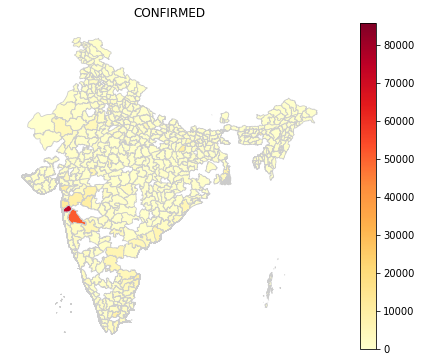

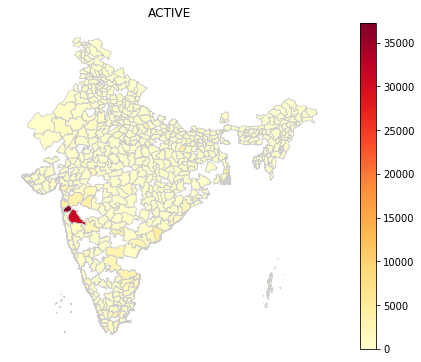

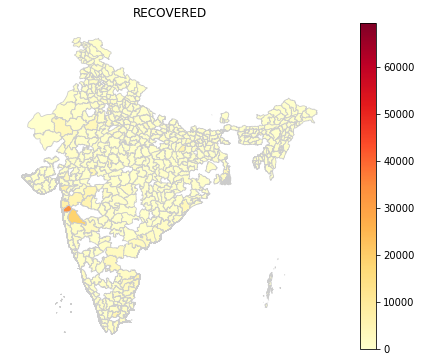

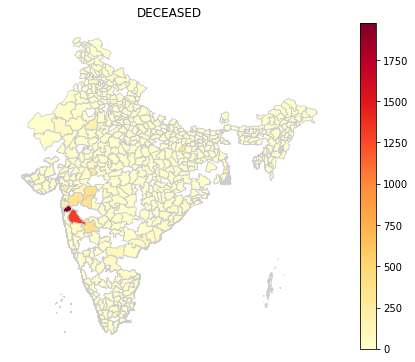

In [757]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('CONFIRMED', fontdict={'fontsize': '12', 'fontweight' : '3'})
merged1.plot(column='Confirmed', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
#fig.savefig("District_wise_Confirmed.png", dpi=100)
plt.show()

fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('ACTIVE', fontdict={'fontsize': '12', 'fontweight' : '3'})
merged1.plot(column='Active', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
#fig.savefig("District_wise_Active.png", dpi=100)
plt.show()

fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('RECOVERED', fontdict={'fontsize': '12', 'fontweight' : '3'})
merged1.plot(column='Recovered', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
#fig.savefig("District_wise_Recovered.png", dpi=100)
plt.show()

fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('DECEASED', fontdict={'fontsize': '12', 'fontweight' : '3'})
merged1.plot(column='Deceased', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
#fig.savefig("District_wise_Deceased.png", dpi=100)
plt.show()

# COVID-19 ML ANALYSIS FOR HIMACHAL PRADESH

In [758]:
fp2 = "gadm36_IND_2.shp"
map_df2 = gpd.read_file(fp2)
map_df2.head()

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,IND,India,IND.1_1,Andaman and Nicobar,None,IND.1.1_1,Nicobar Islands,None,None,District,District,None,IN.AN.NI,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,IND,India,IND.1_1,Andaman and Nicobar,None,IND.1.2_1,North and Middle Andaman,None,None,District,District,None,IN.AN.NM,"MULTIPOLYGON (((92.93898 12.22386, 92.93916 12..."
2,IND,India,IND.1_1,Andaman and Nicobar,None,IND.1.3_1,South Andaman,None,None,District,District,None,IN.AN.SA,"MULTIPOLYGON (((92.47972 10.52056, 92.47945 10..."
3,IND,India,IND.2_1,Andhra Pradesh,None,IND.2.1_1,Anantapur,"Anantpur, Ananthapur",None,District,District,None,IN.AD.AN,"POLYGON ((77.71420 13.76079, 77.71314 13.75074..."
4,IND,India,IND.2_1,Andhra Pradesh,None,IND.2.2_1,Chittoor,Chitoor|Chittor,None,District,District,None,IN.AD.CH,"POLYGON ((78.46293 12.63537, 78.46190 12.63228..."


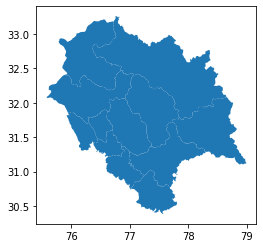

In [759]:
map_df2 = map_df2[['NAME_1', 'NAME_2', 'geometry']]
map_df2 = map_df2[map_df2['NAME_1'] =='Himachal Pradesh']
map_df2.plot()
plt.show()

In [760]:
map_df2

,NAME_1,NAME_2,geometry
186,Himachal Pradesh,Bilaspur,"POLYGON ((76.86139 31.35775, 76.86165 31.35713..."
187,Himachal Pradesh,Chamba,"POLYGON ((76.20420 32.39492, 76.20107 32.38862..."
188,Himachal Pradesh,Hamirpur,"POLYGON ((76.44461 31.48863, 76.43080 31.50599..."
189,Himachal Pradesh,Kangra,"POLYGON ((76.07083 31.83204, 76.07026 31.83286..."
190,Himachal Pradesh,Kinnaur,"POLYGON ((78.90688 31.25919, 78.90585 31.25018..."
191,Himachal Pradesh,Kullu,"POLYGON ((77.46414 31.35682, 77.46134 31.35410..."
192,Himachal Pradesh,Lahul & Spiti,"POLYGON ((78.06035 31.78804, 78.04225 31.78770..."
193,Himachal Pradesh,Mandi,"POLYGON ((77.37191 31.36528, 77.37069 31.36229..."
194,Himachal Pradesh,Shimla,"POLYGON ((77.51051 30.78743, 77.50089 30.79253..."
195,Himachal Pradesh,Sirmaur,"POLYGON ((77.80056 30.51316, 77.79918 30.51139..."


In [761]:
district_wise2 = pd.read_csv('district_wise.csv')
district_wise2.drop(794, inplace = True)
district_wise2.drop(4, inplace = True)
district_wise2.drop(0, inplace = True)
district_wise2.drop(790, inplace = True)
district_wise2.head()

,SlNo,State_Code,State,District_Key,District,Confirmed,Active,Recovered,Deceased,Migrated_Other,Delta_Confirmed,Delta_Active,Delta_Recovered,Delta_Deceased,District_Notes,Last_Updated
1,1,AN,Andaman and Nicobar Islands,AN_Nicobars,Nicobars,0,0,0,0,0,0,0,0,0,NaN,NaN
2,2,AN,Andaman and Nicobar Islands,AN_North and Middle Andaman,North and Middle Andaman,1,0,1,0,0,0,0,0,0,NaN,NaN
3,3,AN,Andaman and Nicobar Islands,AN_South Andaman,South Andaman,51,19,32,0,0,0,0,0,0,NaN,NaN
5,4,AP,Andhra Pradesh,AP_Anantapur,Anantapur,5141,2341,2732,68,0,637,518,116,3,NaN,NaN
6,5,AP,Andhra Pradesh,AP_Chittoor,Chittoor,4647,3139,1462,46,0,440,389,49,2,NaN,NaN


In [762]:
district_wise2 = district_wise2[['State','District', 'Confirmed','Active','Recovered','Deceased']]
district_wise2 = district_wise2[district_wise2['State'] =='Himachal Pradesh']
district_wise2

,State,District,Confirmed,Active,Recovered,Deceased
199,Himachal Pradesh,Bilaspur,63,16,47,0
200,Himachal Pradesh,Chamba,78,22,56,0
201,Himachal Pradesh,Hamirpur,279,12,264,3
202,Himachal Pradesh,Kangra,329,33,291,3
203,Himachal Pradesh,Kinnaur,39,18,21,0
204,Himachal Pradesh,Kullu,20,13,7,0
205,Himachal Pradesh,Lahaul and Spiti,4,0,4,0
206,Himachal Pradesh,Mandi,47,9,36,2
207,Himachal Pradesh,Shimla,71,26,43,2
208,Himachal Pradesh,Sirmaur,64,24,33,0


In [763]:
district_wise2['District'].iloc[6]  = 'Kinnaur'
district_wise2['District'].iloc[10] = 'Shimla'
district_wise2['District'].iloc[12] = 'Una'

/Users/satyan/python/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [764]:
merged2 = map_df2.set_index('NAME_2').join(district_wise2.set_index('District'))
merged2

,NAME_1,geometry,State,Confirmed,Active,Recovered,Deceased
Bilaspur,Himachal Pradesh,"POLYGON ((76.86139 31.35775, 76.86165 31.35713...",Himachal Pradesh,63.0,16.0,47.0,0.0
Chamba,Himachal Pradesh,"POLYGON ((76.20420 32.39492, 76.20107 32.38862...",Himachal Pradesh,78.0,22.0,56.0,0.0
Hamirpur,Himachal Pradesh,"POLYGON ((76.44461 31.48863, 76.43080 31.50599...",Himachal Pradesh,279.0,12.0,264.0,3.0
Kangra,Himachal Pradesh,"POLYGON ((76.07083 31.83204, 76.07026 31.83286...",Himachal Pradesh,329.0,33.0,291.0,3.0
Kinnaur,Himachal Pradesh,"POLYGON ((78.90688 31.25919, 78.90585 31.25018...",Himachal Pradesh,39.0,18.0,21.0,0.0
Kinnaur,Himachal Pradesh,"POLYGON ((78.90688 31.25919, 78.90585 31.25018...",Himachal Pradesh,4.0,0.0,4.0,0.0
Kullu,Himachal Pradesh,"POLYGON ((77.46414 31.35682, 77.46134 31.35410...",Himachal Pradesh,20.0,13.0,7.0,0.0
Lahul & Spiti,Himachal Pradesh,"POLYGON ((78.06035 31.78804, 78.04225 31.78770...",NaN,NaN,NaN,NaN,NaN
Mandi,Himachal Pradesh,"POLYGON ((77.37191 31.36528, 77.37069 31.36229...",Himachal Pradesh,47.0,9.0,36.0,2.0
Shimla,Himachal Pradesh,"POLYGON ((77.51051 30.78743, 77.50089 30.79253...",Himachal Pradesh,71.0,26.0,43.0,2.0


In [765]:
print(merged2.isna().sum())
print('\nVery few district names are mismatching that we will match.')

NAME_1       0
geometry     0
State        2
Confirmed    2
Active       2
Recovered    2
Deceased     2
dtype: int64

Very few district names are mismatching that we will match.


In [766]:
merged2.describe().round()

,Confirmed,Active,Recovered,Deceased
count,13.0,13.0,13.0,13.0
mean,114.0,32.0,80.0,1.0
std,121.0,55.0,95.0,1.0
min,0.0,0.0,0.0,0.0
25%,39.0,12.0,21.0,0.0
50%,64.0,18.0,43.0,0.0
75%,158.0,26.0,113.0,2.0
max,331.0,212.0,291.0,3.0


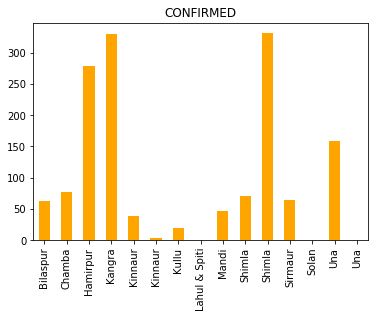

In [767]:
merged2['Confirmed'].plot(kind = 'bar',color = 'orange', title = 'CONFIRMED')
plt.show()

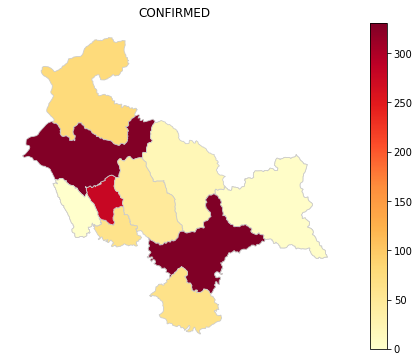

In [768]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('CONFIRMED', fontdict={'fontsize': '12', 'fontweight' : '3'})
merged2.plot(column='Confirmed', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.show()

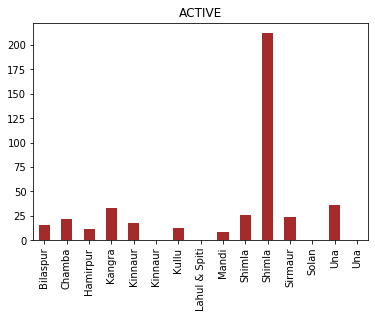

In [769]:
merged2['Active'].plot(kind = 'bar',color = 'brown', title = 'ACTIVE')
plt.show()

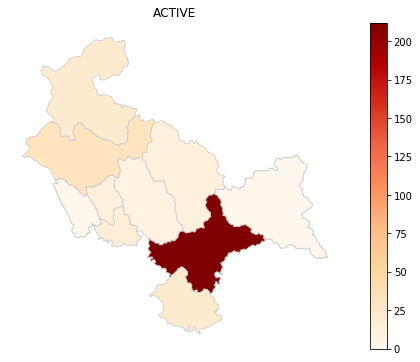

In [770]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('ACTIVE', fontdict={'fontsize': '12', 'fontweight' : '3'})
merged2.plot(column='Active', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.show()

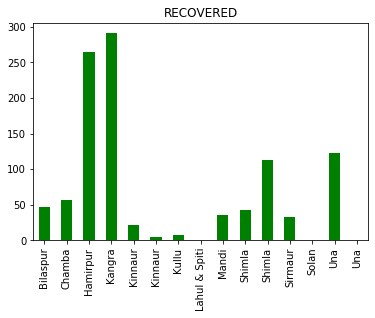

In [771]:
merged2['Recovered'].plot(kind = 'bar',color = 'green', title = 'RECOVERED')
plt.show()

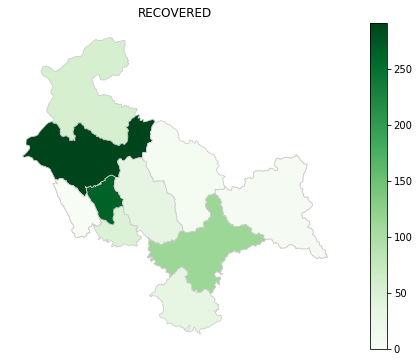

In [772]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('RECOVERED', fontdict={'fontsize': '12', 'fontweight' : '3'})
merged2.plot(column='Recovered', cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.show()

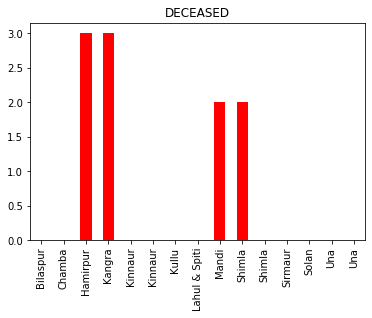

In [773]:
merged2['Deceased'].plot(kind = 'bar',color = 'red', title = 'DECEASED')
plt.show()

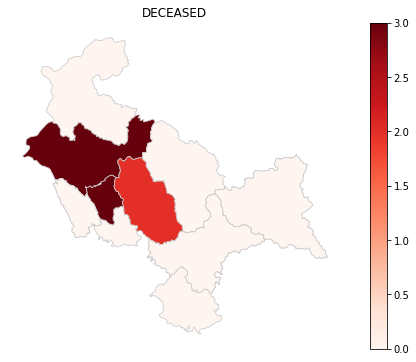

In [774]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('DECEASED', fontdict={'fontsize': '12', 'fontweight' : '3'})
merged2.plot(column='Deceased', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.show()

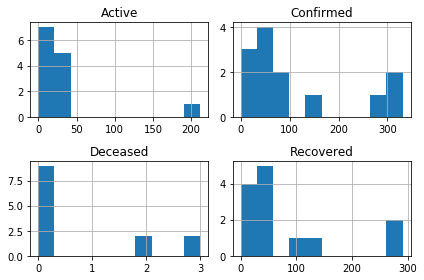

            Histogram: Punjab DISTRICTS Covid-19


In [775]:
district_wise2.hist()
plt.tight_layout()
plt.show()
print('            Histogram: Himachal Pradesh DISTRICTS Covid-19')

# B. Correlation heatmap for various parameters PAML

In [776]:
CovidTEST1 = pd.read_csv("HospitalBedsIndia.csv")
CovidTEST1.drop(36, inplace = True)
CovidTEST1.head()

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,1,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500
1,2,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,3,Arunachal Pradesh,122,62,NaN,15,199,2320,208,2136,10,268
3,4,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,5,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936


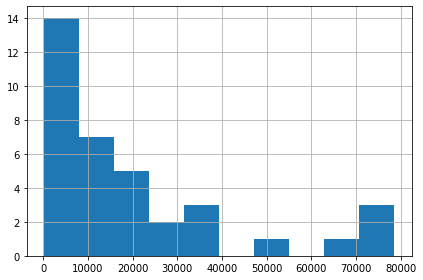

 Histogram - HOSPITAL BEDS :STATEWISE INDIA Covid-19


In [777]:
CovidTEST1['BEDS'] = CovidTEST1['NumRuralBeds_NHP18']+CovidTEST1['NumUrbanBeds_NHP18']
CovidTEST1['BEDS'].hist()
plt.tight_layout()
plt.show()
print(' Histogram - HOSPITAL BEDS :STATEWISE INDIA Covid-19')

In [778]:
COVIDBEDS = CovidTEST1[['State/UT','BEDS']]
COVIDBEDS.head()

,State/UT,BEDS
0,Andaman & Nicobar Islands,1075
1,Andhra Pradesh,23138
2,Arunachal Pradesh,2404
3,Assam,17142
4,Bihar,12019


In [779]:
FinalDataF.head()

,State,Cured,Deaths,Confirmed,Population,IFR,CMR,CCR
0,Andaman & Nicobar Island,2406.0,0.0,3202.0,380581.0,0.000000,0.000000,75.140537
1,Andhra Pradesh,172711.0,5385.0,353409.0,49577103.0,1.523730,0.010862,48.870006
2,Arunanchal Pradesh,673.0,8.0,3476.0,1383727.0,0.230150,0.000578,19.361335
3,Assam,85791.0,342.0,158131.0,31205576.0,0.216276,0.001096,54.253119
4,Bihar,168614.0,1772.0,275501.0,104099452.0,0.643192,0.001702,61.202682


In [780]:
mergedX = COVIDBEDS.set_index('State/UT').join(FinalDataF.set_index('State')).dropna()
mergedX.head()

,BEDS,Cured,Deaths,Confirmed,Population,IFR,CMR,CCR
State/UT,,,,,,,,
Andhra Pradesh,23138,172711.0,5385.0,353409.0,49577103.0,1.523730,0.010862,48.870006
Assam,17142,85791.0,342.0,158131.0,31205576.0,0.216276,0.001096,54.253119
Bihar,12019,168614.0,1772.0,275501.0,104099452.0,0.643192,0.001702,61.202682
Chandigarh,778,12453.0,254.0,18676.0,1055450.0,1.360034,0.024066,66.679160
Chhattisgarh,9412,37314.0,271.0,63356.0,25545198.0,0.427742,0.001061,58.895764


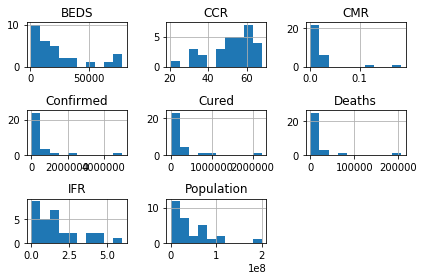

 STATES Vs PARAMETERS  Histogram: India Covid-19


In [781]:
mergedX.hist()
plt.tight_layout()
plt.show()
print(' STATES Vs PARAMETERS  Histogram: India Covid-19')

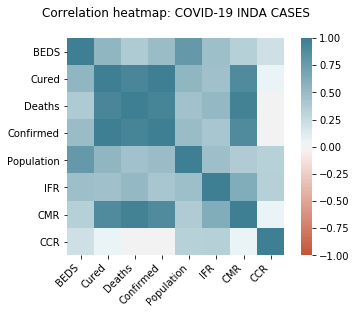

In [782]:
corr5 = mergedX.corr()
ax = sns.heatmap(
    corr5, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.set_title('Correlation heatmap: COVID-19 INDA CASES\n')
plt.show()

In [783]:
CovidTEST = pd.read_csv("statewise_tested_numbers_data.csv")
CovidTestX = CovidTEST[['Updated On','State','Total Tested','Positive','Total People Currently in Quarantine','Test positivity rate','Tests per thousand','Tests per positive case','Population NCP 2019 Projection']].dropna()
print(CovidTestX.tail())

      Updated On        State  Total Tested  Positive  \
2839  02/07/2020  West Bengal      508001.0   19819.0   
2840  03/07/2020  West Bengal      519054.0   20488.0   
2841  04/07/2020  West Bengal      530072.0   21231.0   
2842  05/07/2020  West Bengal      541088.0   22126.0   
2843  06/07/2020  West Bengal      552007.0   22987.0   

      Total People Currently in Quarantine Test positivity rate  \
2839                                6449.0                3.90%   
2840                                6287.0                3.95%   
2841                                6057.0                4.01%   
2842                                5690.0                4.09%   
2843                                5605.0                4.16%   

      Tests per thousand  Tests per positive case  \
2839                5.24                     26.0   
2840                5.36                     25.0   
2841                5.47                     25.0   
2842                5.58                  

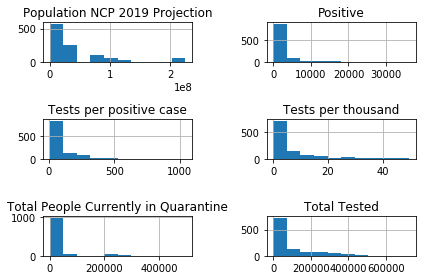

            Histogram - II:TIMESERIES BASED INDIA Covid-19


In [784]:
CovidTestX.hist()
plt.tight_layout()
plt.show()
print('            Histogram - II:TIMESERIES BASED INDIA Covid-19')

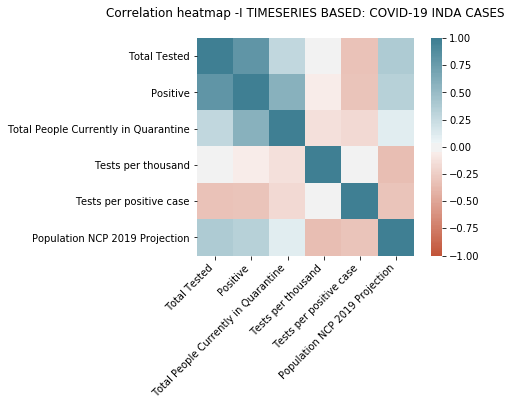

In [785]:
corr2 = CovidTestX.corr()
ax = sns.heatmap(
    corr2, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.set_title('Correlation heatmap -I TIMESERIES BASED: COVID-19 INDA CASES\n')
plt.show()

In [786]:
CovidTestX1 = CovidTestX[CovidTestX['Updated On']=='03/07/2020']
print(CovidTestX1)

      Updated On              State  Total Tested  Positive  \
293   03/07/2020              Assam      438882.0    9434.0   
801   03/07/2020                Goa       72691.0    1576.0   
890   03/07/2020            Gujarat      395873.0   34686.0   
982   03/07/2020            Haryana      288478.0   16003.0   
1070  03/07/2020   Himachal Pradesh       85116.0    1033.0   
1159  03/07/2020  Jammu and Kashmir      385501.0    8019.0   
1245  03/07/2020          Jharkhand      151699.0    2697.0   
1337  03/07/2020          Karnataka      671934.0   19710.0   
1434  03/07/2020             Kerala      253011.0    4965.0   
1487  03/07/2020             Ladakh       14361.0    1001.0   
1720  03/07/2020            Manipur       53608.0    1316.0   
1873  03/07/2020            Mizoram       14370.0     162.0   
1962  03/07/2020           Nagaland       18635.0     539.0   
2134  03/07/2020         Puducherry       19560.0     824.0   
2225  03/07/2020             Punjab      324054.0    59

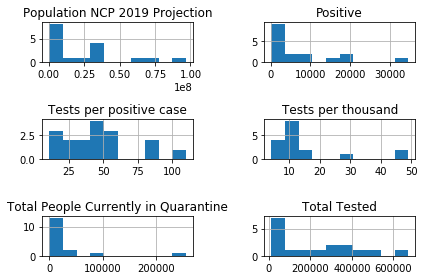

            Histogram - II:STATEWISE INDIA Covid-19


In [787]:
CovidTestX1.hist()
plt.tight_layout()
plt.show()
print('            Histogram - II:STATEWISE INDIA Covid-19')

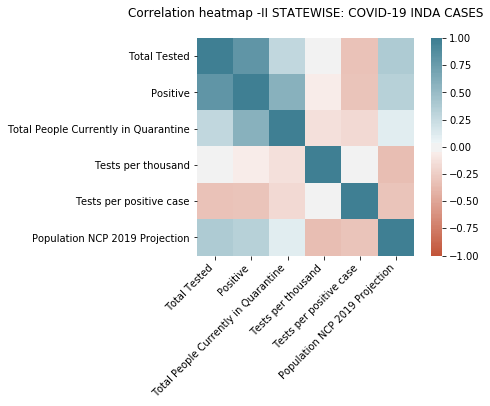

In [788]:
corr3 = CovidTestX.corr()
ax = sns.heatmap(
    corr3, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.set_title('Correlation heatmap -II STATEWISE: COVID-19 INDA CASES\n')
plt.show()

In [789]:
print('Histogram Heatmap for Covid-19 India Data yileds same result for TIMESERIES BASED as well as STATEWISE analysis.')

Histogram Heatmap for Covid-19 India Data yileds same result for TIMESERIES BASED as well as STATEWISE analysis.


In [790]:
print('Interpretation Ex: As population increases, tests per thousand cases decreases ( which is obvious)')

Interpretation Ex: As population increases, tests per thousand cases decreases ( which is obvious)


# QUICK AND SIMPLE PREDICTOR: As the number of Days increase from the infection increases through contageon. Thus we use this high correlation to build a simple confirmed and cured cases predictor for a future date. We drop inital days data as determined from Advanced ARIMA models (in other notebook of Major Project)

In [791]:
CovidDF.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [792]:
PredIND = CovidDF[['Date','Cured','Confirmed']]
PredIND.set_index('Date', inplace = True)
PredIND.tail()

,Cured,Confirmed
Date,,
03/07/20,1146,1435
03/07/20,2405,2984
03/07/20,17221,24825
03/07/20,13037,19819
03/07/20,0,6031


In [793]:
PredIN = PredIND.groupby('Date',sort=False).sum()
PredIN.tail()

,Cured,Confirmed
Date,,
29/06/20,321723,548318
30/06/20,334822,566840
01/07/20,347979,585493
02/07/20,359860,604641
03/07/20,379892,625544


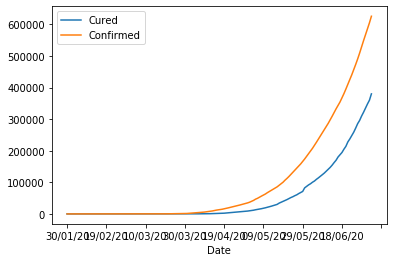

In [794]:
PredIN.plot()
plt.show()

In [795]:
PredXIN = PredIN[80:]
PredXIN.head()

,Cured,Confirmed
Date,,
19/04/20,2302,16116
20/04/20,2842,17656
21/04/20,3260,18985
22/04/20,3960,20471
23/04/20,4325,21700


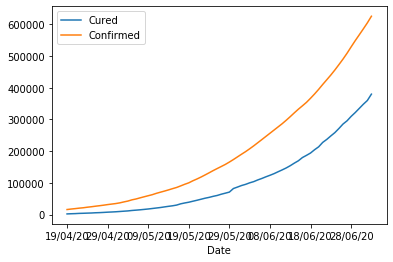

In [796]:
PredXIN.plot()
plt.show()

# It can be observed from the curves above (curvature with no point where tangent = 0, that they can be best regressed with polynomial of degree 2¶

In [797]:
XX  = l = [i for i in range(1,len(PredXIN)+1)]
p1 = np.polyfit(XX,PredXIN['Confirmed'],2)
p2 = np.polyfit(XX,PredXIN['Cured'],2)
print(p1)
print(p2)

print('\nPredicttion Eqn of Confirmed Cases is round(34183.44837838+X*(-1736.73743086)+121.21847832*X*X)')
print('Predicttion Eqn of Cured Cases is round(20990.53843528+X*(-2365.56173147)+88.98286294*X*X')

[  121.21847832 -1736.73743086 34183.44837838]
[   88.98286294 -2365.56173147 20990.53843528]

Predicttion Eqn of Confirmed Cases is round(34183.44837838+X*(-1736.73743086)+121.21847832*X*X)
Predicttion Eqn of Cured Cases is round(20990.53843528+X*(-2365.56173147)+88.98286294*X*X


In [798]:
X = pd.Series(XX)
PredictedConfirmed = pd.DataFrame(round(34183.44837838+X*(-1736.73743086)+121.21847832*X*X),columns = ['Predicted'])
CompareConfirmed =  pd.DataFrame(np.column_stack([PredictedConfirmed,PredXIN['Confirmed']]),columns=['Predicted','Actual_Confirmed'])

PredictedCured = pd.DataFrame(round(20990.53843528+X*(-2365.56173147)+88.98286294*X*X),columns = ['Predicted'])
CompareCured =  pd.DataFrame(np.column_stack([PredictedCured,PredXIN['Cured']]),columns=['Predicted','Actual_Cured'])


In [799]:
CompareConfirmed.tail()

,Predicted,Actual_Confirmed
71,537535.0,548318.0
72,553375.0,566840.0
73,569457.0,585493.0
74,585782.0,604641.0
75,602349.0,625544.0


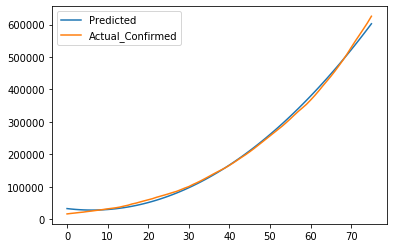

In [800]:
CompareConfirmed.plot()
plt.show()

In [801]:
print('Mean Absolute Error:', metrics.mean_absolute_error(PredXIN['Confirmed'], PredictedConfirmed))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(PredXIN['Confirmed'], PredictedConfirmed)))

Mean Absolute Error: 6326.776315789473
Root Mean Squared Error: 7740.044264969304


In [802]:
CompareCured.tail()

,Predicted,Actual_Cured
71,311957.0,321723.0
72,322494.0,334822.0
73,333209.0,347979.0
74,344102.0,359860.0
75,355173.0,379892.0


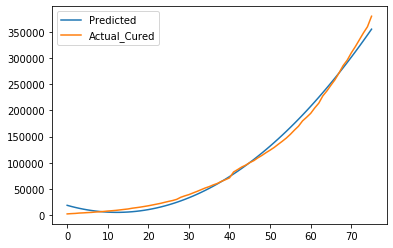

In [803]:
CompareCured.plot()
plt.show()

In [804]:
print('Mean Absolute Error:', metrics.mean_absolute_error(PredXIN['Cured'], PredictedCured))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(PredXIN['Cured'], PredictedCured)))

Mean Absolute Error: 6832.9078947368425
Root Mean Squared Error: 8224.089054498121


# When we start seeing flattening and or possible declining of respective curves for confirmed and cured case we will modify our predictor model and use polynomial of degree 3 to accomodate the same. If we observe the Confirmed cases plot we can see inflexion point (where second derivative, i.e rate of change of slope changes sign from positive to negative - early sign of flattening or possible decline)

In [805]:
print('Predicting for future dates:')
print('Date 19.04.2020 is Day 1')
print('Date 03.07.2020 is Day 76')
print('\nPredicttion Eqn of Confirmed Cases is round(34183.44837838+X*(-1736.73743086)+121.21847832*X*X)')
print('Predicttion Eqn of Cured Cases is round(20990.53843528+X*(-2365.56173147)+88.98286294*X*X')

Predicting for future dates:
Date 19.04.2020 is Day 1
Date 03.07.2020 is Day 76

Predicttion Eqn of Confirmed Cases is round(34183.44837838+X*(-1736.73743086)+121.21847832*X*X)
Predicttion Eqn of Cured Cases is round(20990.53843528+X*(-2365.56173147)+88.98286294*X*X
